In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
#####  Function to compute time for wall collision ######
def wall_time(coord, velcomp, rad):  
    if velcomp > 0.0:
        del_t = (1.0 - rad - coord) / velcomp
    elif velcomp < 0.0:
        del_t = (coord - rad) / abs(velcomp)
    else:
        del_t = float('inf')
    return del_t


# Function to calculate time it takes for a pair of particles to collide. 
# pos1 and pos2 are positions of particles 1 and 2, vel1 and vel2 are their 
# velocities. rad is the radius of the particles. 
def pair_time(pos1, vel1, pos2, vel2, rad):  
    rel_pos = pos2 - pos1
    rel_vel = vel2 - vel1
    rel_dist_squar = np.dot(rel_pos,rel_pos)
    rel_speed_squar = np.dot(rel_vel,rel_vel)
    scal_prod = np.dot(rel_pos,rel_vel)
    a = scal_prod ** 2 - rel_speed_squar * ( rel_dist_squar - 4.0 * rad **2)
    if a > 0.0 and scal_prod < 0.0: ## Conditions for collision.
        del_t = - (scal_prod + np.sqrt(a)) / rel_speed_squar ## Collision time.
    else:
        del_t = float('inf')
    return del_t


# Function to generate an image of the disk configuration in the box.
def create_picture(positions):
    plt.cla()
    plt.gca().set_aspect('equal')
    plt.axis([0, L, 0, L])
    plt.setp(plt.gca(), xticks=[0, L], yticks=[0, L])
    for x,y in positions:
        atom = plt.Circle((x, y), Ratom, fc='r')
        plt.gca().add_patch(atom)
    

In [3]:
######################### Initialization #################################
L = 1. ## Box edge length
Natoms = 4  # Number of disks
density = 0.2 # Fraction of the area of the box covered by the disks
Ratom = np.sqrt(density/(Natoms*np.pi))   ## Radius of disk.

## List indexing all pairs of atoms.
pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)] 

## Positions and velocities of disks.


print(pairs)
#################################################################################

[[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]


In [47]:
n_events = 4 # Number of collision events.
t = 0 # Initial time.
positions = np.array([[0.4,0.4],[0.4,0.6],[0.6, 0.4], [0.6,0.6]])
velocities = np.array([[1.,0.],[1.,1.],[0.,1.],[0.,0.]])

pos_inst=[0 for j in range(n_events*4)]
n=0
############### Event Loop ##############################################
for event in range(n_events):
   # Wall collision times for all disks and their velocity components.
    wall_times = [wall_time(positions[i][j], velocities[i][j], Ratom) for i in range(Natoms) for j in range(2)] 
    # Pair collision times  ## pos[i][j]=ith ball and jth coordinate  j here is component
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision event is the minimum of wall and pair collision times.
    next_event = min(wall_times + pair_times)  
    #################  snapshots ###############
    t_inst=np.linspace(t,next_event,5)
    t_list=np.delete(t_inst,len(t_inst)-1)  ### otherwise index goes out of range

    for snapshot_time in t_list:
        result = np.where(t_list == snapshot_time)
        ind=result[0][0]
        delta_t=t_inst[ind+1]-t_inst[ind]
        for i in range(Natoms):
            positions[i] += velocities[i]*(delta_t)
        pos_inst.extend(positions)
        print(pos_inst)
        n=n+1
        
        
    if min(wall_times) < min(pair_times): # Check if next event is a collision with a wall
        wall_index = wall_times.index(next_event)
        particle, component = divmod(wall_index, 2)
        velocities[particle][component] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_event)
        particle_1, particle_2 = pairs[pair_index] # Indices of particles participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp

##################################################################################

print(pos_inst)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, array([0.38692169, 0.4       ]), array([0.38692169, 0.58692169]), array([0.6       , 0.38692169]), array([0.6, 0.6])]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, array([0.37384337, 0.4       ]), array([0.37384337, 0.57384337]), array([0.6       , 0.37384337]), array([0.6, 0.6]), array([0.37384337, 0.4       ]), array([0.37384337, 0.57384337]), array([0.6       , 0.37384337]), array([0.6, 0.6])]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, array([0.36076506, 0.4       ]), array([0.36076506, 0.56076506]), array([0.6       , 0.36076506]), array([0.6, 0.6]), array([0.36076506, 0.4       ]), array([0.36076506, 0.56076506]), array([0.6       , 0.36076506]), array([0.6, 0.6]), array([0.36076506, 0.4       ]), array([0.36076506, 0.56076506]), array([0.6       , 0.36076506]), array([0.6, 0.6])]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, array([0.34768675, 0.4       ]), array([0.34768675, 0.54768675]), array([0.6       , 0.34768675]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, array([0.36276036, 0.44525278]), array([0.36276036, 0.73102456]), array([0.81351698, 0.30243397]), array([0.81351698, 0.87384337]), array([0.36276036, 0.44525278]), array([0.36276036, 0.73102456]), array([0.81351698, 0.30243397]), array([0.81351698, 0.87384337]), array([0.36276036, 0.44525278]), array([0.36276036, 0.73102456]), array([0.81351698, 0.30243397]), array([0.81351698, 0.87384337]), array([0.36276036, 0.44525278]), array([0.36276036, 0.73102456]), array([0.81351698, 0.30243397]), array([0.81351698, 0.87384337]), array([0.36276036, 0.44525278]), array([0.36276036, 0.73102456]), array([0.81351698, 0.30243397]), array([0.81351698, 0.87384337]), array([0.36276036, 0.44525278]), array([0.36276036, 0.73102456]), array([0.81351698, 0.30243397]), array([0.81351698, 0.87384337]), array([0.36276036, 0.44525278]), array([0.36276036, 0.73102456]), array([0.81351698, 0.30243397]), array([0.81351698, 0.87384337]), array([0.36276036, 0.445252

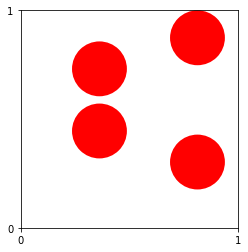

In [5]:
create_picture(positions)   #0.00548274

In [46]:
pos_inst[1]

array([[0.36276036, 0.44525278],
       [0.36276036, 0.73102456],
       [0.81351698, 0.30243397],
       [0.81351698, 0.87384337]])

In [7]:
a=np.array([[3,2,5,2],[4,2,3,1]])
b=np.array([[1,2,4,5],[1,3,6,3]])
c=[]
c.append(a)
c.append(b)
d=[]
for i in range(2):
    for j in range(2):
        print(c[j])
        d.append(c[j])
print(d)

[[3 2 5 2]
 [4 2 3 1]]
[[1 2 4 5]
 [1 3 6 3]]
[[3 2 5 2]
 [4 2 3 1]]
[[1 2 4 5]
 [1 3 6 3]]
[array([[3, 2, 5, 2],
       [4, 2, 3, 1]]), array([[1, 2, 4, 5],
       [1, 3, 6, 3]]), array([[3, 2, 5, 2],
       [4, 2, 3, 1]]), array([[1, 2, 4, 5],
       [1, 3, 6, 3]])]


In [8]:
p=np.empty([])
p

array(0.)

In [38]:
a=[]
for i in range(0,10):
    y=np.zeros((4,2))
    a.append(y)
print(a[0])

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


In [157]:
a=[[1,2,3],[3,4,2]]
b=[[3,6,4],[8,9,7]]
a+b

[[1, 2, 3], [3, 4, 2], [3, 6, 4], [8, 9, 7]]

In [48]:
a=np.array([[1,2,3],[4,5,6]])
b=np.array([[7,8,9],[10,11,12]])
a+b

array([[ 8, 10, 12],
       [14, 16, 18]])

In [25]:
y=[]
y

[1, 1, 1, 1]

In [13]:
y=[[]*4 for _ in range(3)]
y

[[], [], []]

In [22]:
pos_inst=[[] for _ in range(16)]
a=np.array([[1,2,3],[4,5,6]])
b=np.array([[7,8,9],[10,11,12]])
print(pos_inst)
pos_inst[1]=a
pos_inst

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


[[],
 array([[1, 2, 3],
        [4, 5, 6]]),
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]